<a href="https://colab.research.google.com/github/Manya-65/assigment1/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the Glass dataset using the Random Forest model, including EDA, visualization, preprocessing, model implementation, and comparison with Bagging and Boosting methods. Explain Bagging, Boosting, and handling data imbalance.

## Load the dataset

### Subtask:
Load the Glass dataset into a pandas DataFrame.


**Reasoning**:
Import the pandas library, read the Excel file into a DataFrame, and display the first few rows.



In [ ]:
import pandas as pd

df = pd.read_excel('/content/glass.xlsx')
display(df.head())

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum


**Reasoning**:
The previous output shows that the Excel file was not read correctly, as it seems to have read the introductory text instead of the actual data. I need to re-read the Excel file, likely specifying the correct starting row to skip the introductory text. I will try to read the file again, skipping the first 11 rows based on the previous output.



In [ ]:
df = pd.read_excel('/content/glass.xlsx', skiprows=11)
display(df.head())

,Unnamed: 0
0,Type: Type of glass: (class attribute)
1,1 -- building_windows_float_processed
2,2 --building_windows_non_float_processed
3,3 --vehicle_windows_float_processed
4,4 --vehicle_windows_non_float_processed (none...


**Reasoning**:
The previous attempt to load the data still did not load the actual dataset, but rather the description of the glass types. I need to examine the Excel file structure more closely to determine the correct rows to skip and potentially the sheet name if there are multiple sheets. Since I cannot directly inspect the file content or structure, I will try reading the file again, this time skipping a larger number of rows to see if I can get to the actual data, and also print the column names to understand what was loaded.



In [ ]:
df = pd.read_excel('/content/glass.xlsx', skiprows=12)
display(df.head())
display(df.columns)

,Type: Type of glass: (class attribute)
0,1 -- building_windows_float_processed
1,2 --building_windows_non_float_processed
2,3 --vehicle_windows_float_processed
3,4 --vehicle_windows_non_float_processed (none...
4,5 --containers


Index(['Type: Type of glass: (class attribute)'], dtype='object')

**Reasoning**:
The previous attempts to load the data were unsuccessful, as the DataFrame still contains metadata about the glass types. It seems the actual data is located after this descriptive text. I will try skipping more rows to reach the actual data and then display the head and columns to confirm.



In [ ]:
df = pd.read_excel('/content/glass.xlsx', skiprows=20)
display(df.head())
display(df.columns)

""


RangeIndex(start=0, stop=0, step=1)

**Reasoning**:
Skipping 20 rows resulted in an empty DataFrame, indicating I skipped too many rows or the data isn't starting exactly after row 20. I will try skipping a smaller number of rows, closer to the end of the description I saw in the previous attempts, and examine the result. I will try skipping 15 rows.



In [ ]:
df = pd.read_excel('/content/glass.xlsx', skiprows=15)
display(df.head())
display(df.columns)

,3 --vehicle_windows_float_processed
0,4 --vehicle_windows_non_float_processed (none...
1,5 --containers
2,6 --tableware
3,7 --headlamps


Index([' 3 --vehicle_windows_float_processed'], dtype='object')

**Reasoning**:
Skipping 15 rows still did not load the actual data. It seems the data might start right after the list of glass types. I will try skipping 10 rows, as the list of glass types seemed to end around that point based on previous outputs. I will also examine the column names again.



In [ ]:
df = pd.read_excel('/content/glass.xlsx', skiprows=10)
display(df.head())
display(df.columns)

,Fe: Iron
0,NaN
1,Type: Type of glass: (class attribute)
2,1 -- building_windows_float_processed
3,2 --building_windows_non_float_processed
4,3 --vehicle_windows_float_processed


Index(['Fe: Iron'], dtype='object')

**Reasoning**:
Skipping 10 rows still resulted in the description of glass types. It appears the actual data table starts further down. Based on the previous attempts, it seems the actual data might begin after the description of all glass types, which goes up to type 7. I will try skipping 13 rows, as this seems to be around the end of the list of glass types.



In [ ]:
df = pd.read_excel('/content/glass.xlsx', skiprows=13)
display(df.head())
display(df.columns)

,1 -- building_windows_float_processed
0,2 --building_windows_non_float_processed
1,3 --vehicle_windows_float_processed
2,4 --vehicle_windows_non_float_processed (none...
3,5 --containers
4,6 --tableware


Index(['1 -- building_windows_float_processed'], dtype='object')

**Reasoning**:
The previous attempts to load the data were unsuccessful. The DataFrame still contains the list of glass types. I need to keep skipping rows until I reach the actual data table. Based on the previous outputs, it seems the actual data starts after the description of the glass types, which goes up to type 7. I will try skipping 14 rows, as this is one more than my previous unsuccessful attempt.



In [ ]:
df = pd.read_excel('/content/glass.xlsx', skiprows=14)
display(df.head())
display(df.columns)

,2 --building_windows_non_float_processed
0,3 --vehicle_windows_float_processed
1,4 --vehicle_windows_non_float_processed (none...
2,5 --containers
3,6 --tableware
4,7 --headlamps


Index([' 2 --building_windows_non_float_processed'], dtype='object')

## Load the dataset

### Subtask:
Load the Glass dataset into a pandas DataFrame.


**Reasoning**:
Attempt to load the data by trying different sheet names in the Excel file, as the data might not be in the default sheet. Then, display the head and column names.



In [ ]:
try:
    df = pd.read_excel('/content/glass.xlsx', sheet_name='GlassData')
    display(df.head())
    display(df.columns)
except Exception as e:
    print(f"Could not load sheet 'GlassData': {e}")
    try:
        df = pd.read_excel('/content/glass.xlsx', sheet_name='Sheet1')
        display(df.head())
        display(df.columns)
    except Exception as e:
        print(f"Could not load sheet 'Sheet1': {e}")
        try:
            excel_file = pd.ExcelFile('/content/glass.xlsx')
            print(f"Available sheets: {excel_file.sheet_names}")
            # Attempt to load the first available sheet if 'GlassData' and 'Sheet1' fail
            if excel_file.sheet_names:
                df = excel_file.parse(excel_file.sheet_names[0])
                display(df.head())
                display(df.columns)
            else:
                print("No sheets found in the Excel file.")
        except Exception as e:
            print(f"Could not load any sheet: {e}")


Could not load sheet 'GlassData': Worksheet named 'GlassData' not found
Could not load sheet 'Sheet1': Worksheet named 'Sheet1' not found
Available sheets: ['Description', 'glass']


,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum


Index(['Prepare a model for glass classification using Random Forest'], dtype='object')

**Reasoning**:
Based on the previous output, the available sheets are 'Description' and 'glass'. The 'Description' sheet contains introductory text. Attempt to load the data from the 'glass' sheet, which is likely to contain the actual dataset. Then, display the head and column names.



In [ ]:
df = pd.read_excel('/content/glass.xlsx', sheet_name='glass')
display(df.head())
display(df.columns)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

## Perform eda

### Subtask:
Conduct exploratory data analysis to understand the dataset's structure, check for missing values, outliers, and inconsistencies.


**Reasoning**:
Display the first few rows, check data types and non-null counts, generate descriptive statistics, and check for missing values to understand the dataset's structure and identify potential issues.



In [ ]:
display(df.head())
display(df.info())
display(df.describe())
display(df.isnull().sum())

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


None

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


## Visualize the data

### Subtask:
Create visualizations to explore feature distributions and relationships.


**Reasoning**:
The instructions require creating visualizations for feature distributions, relationships, and target variable distribution. These steps can be combined into a single code block for efficiency.



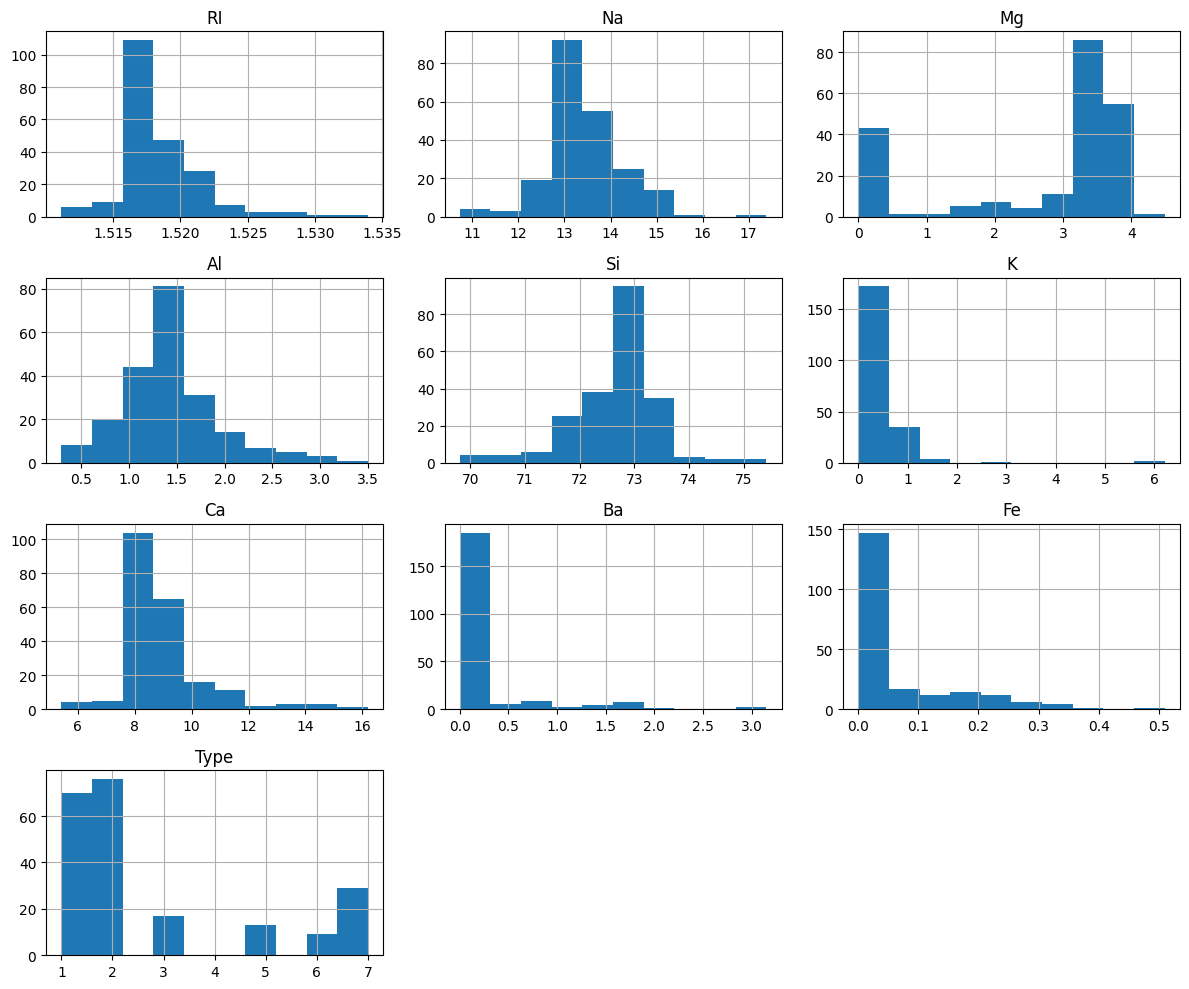

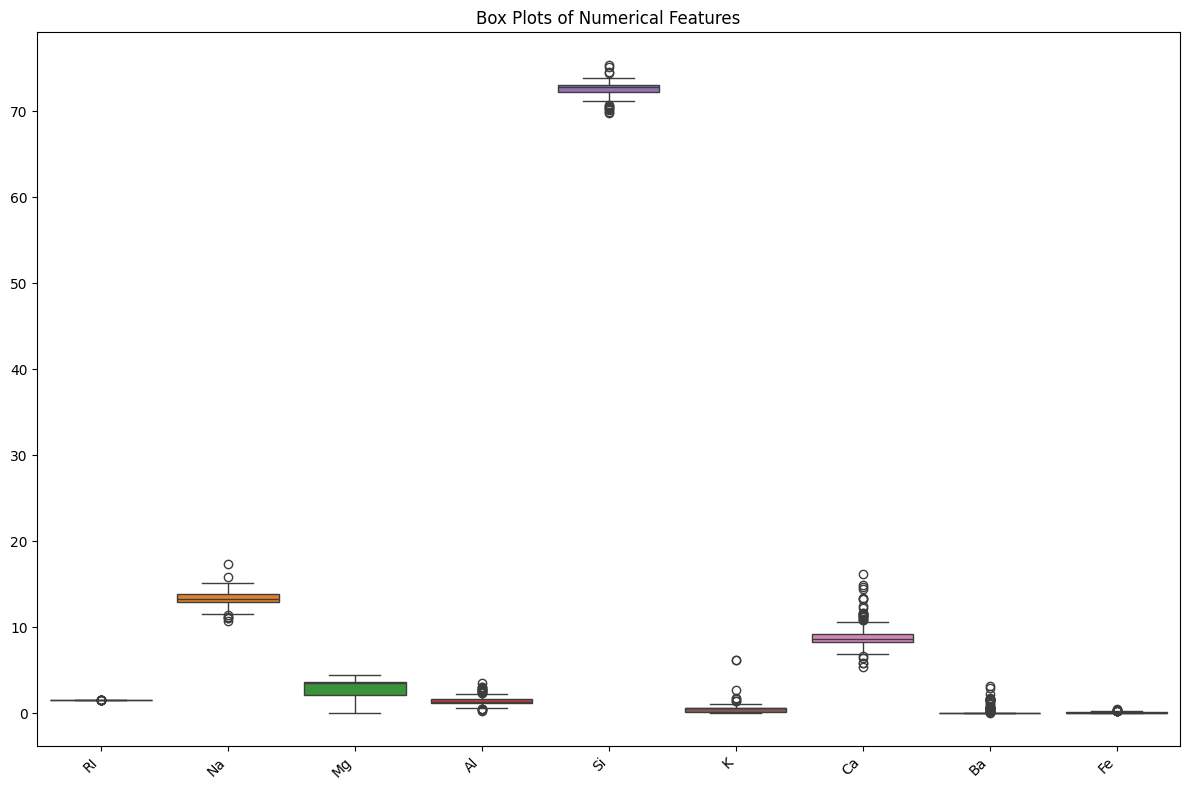

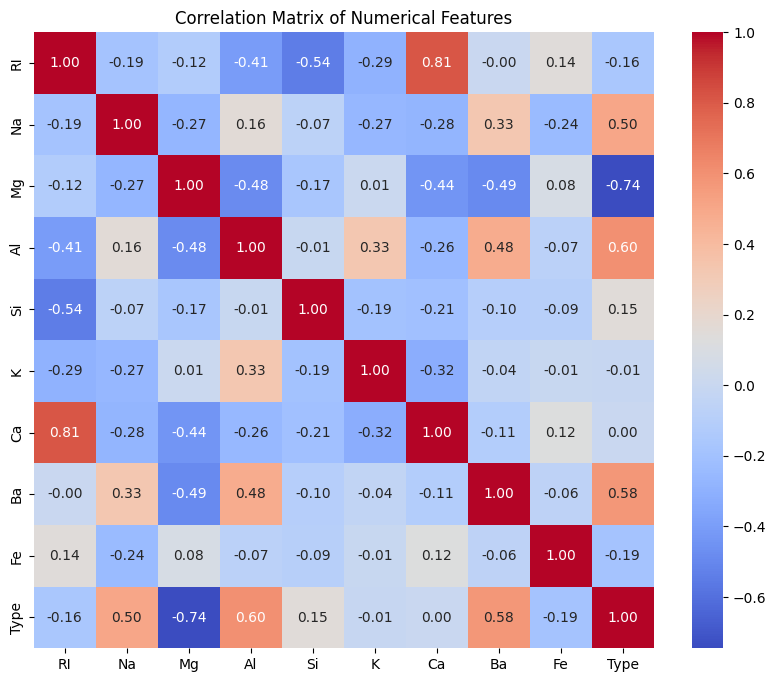

/tmp/ipython-input-3564847314.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='viridis')


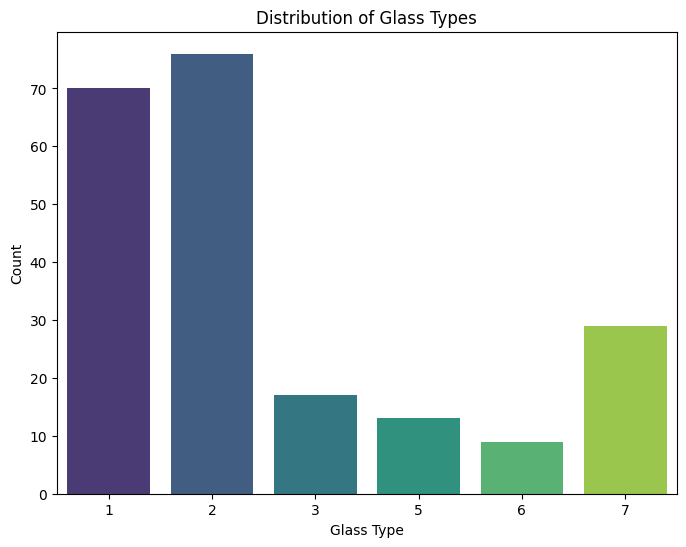

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for numerical features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Generate box plots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['Type']))
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Generate count plot for the target variable 'Type'
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df, palette='viridis')
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

## Preprocess the data

### Subtask:
Handle missing values, encode categorical variables, and scale features. Address data imbalance if necessary.


**Reasoning**:
Based on the previous EDA, there are no missing values and no categorical variables to encode. The primary preprocessing steps required are scaling numerical features and addressing the observed data imbalance in the 'Type' column. I will use StandardScaler for scaling and check the distribution of the target variable to confirm the imbalance before deciding on a handling technique.



In [ ]:
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Separate features (X) and target (y)
X = df.drop('Type', axis=1)
y = df['Type']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Check the distribution of the target variable
print("Distribution of Glass Types:")
display(y.value_counts().sort_index())

# Check for data imbalance
imbalance = Counter(y)
print("\nData imbalance check:")
display(imbalance)


Distribution of Glass Types:


,count
Type,
1,70
2,76
3,17
5,13
6,9
7,29



Data imbalance check:


Counter({1: 70, 2: 76, 3: 17, 5: 13, 6: 9, 7: 29})

**Reasoning**:
The previous step confirmed the data imbalance in the target variable 'Type'. To address this, I will use the SMOTE technique from the imblearn library to oversample the minority classes.



In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle data imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)

# Check the distribution of the target variable after resampling
print("Distribution of Glass Types after SMOTE:")
display(pd.Series(y_resampled).value_counts().sort_index())

# Check for data imbalance after resampling
imbalance_resampled = Counter(y_resampled)
print("\nData imbalance check after SMOTE:")
display(imbalance_resampled)

Distribution of Glass Types after SMOTE:


,count
Type,
1,76
2,76
3,76
5,76
6,76
7,76



Data imbalance check after SMOTE:


Counter({1: 76, 2: 76, 3: 76, 5: 76, 6: 76, 7: 76})

## Split the data

### Subtask:
Divide the dataset into training and testing sets.


**Reasoning**:
Split the resampled data into training and testing sets using train_test_split with a test size of 20% and a random state for reproducibility.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (364, 9)
y_train: (364,)

Testing set shapes:
X_test: (92, 9)
y_test: (92,)


## Implement random forest

### Subtask:
Train a Random Forest classifier on the training data and evaluate its performance on the test data using appropriate metrics.


**Reasoning**:
Train a RandomForestClassifier model on the training data and evaluate its performance on the test data using standard classification metrics.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9239130434782609

Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92


Confusion Matrix:
[[13  2  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 17]]


## Apply bagging and boosting

### Subtask:
Implement and train models using Bagging and Boosting methods and evaluate their performance.


**Reasoning**:
Implement and train Bagging and Boosting models, then evaluate their performance using accuracy, classification report, and confusion matrix.



In [ ]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Implement and train BaggingClassifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Make predictions with BaggingClassifier
y_pred_bagging = bagging_clf.predict(X_test)

# Evaluate BaggingClassifier
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Performance:")
print("Accuracy:", accuracy_bagging)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bagging))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bagging))

print("-" * 50)

# Implement and train GradientBoostingClassifier
boosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
boosting_clf.fit(X_train, y_train)

# Make predictions with GradientBoostingClassifier
y_pred_boosting = boosting_clf.predict(X_test)

# Evaluate GradientBoostingClassifier
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("Gradient Boosting Classifier Performance:")
print("Accuracy:", accuracy_boosting)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_boosting))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_boosting))

Bagging Classifier Performance:
Accuracy: 0.9347826086956522

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.89      0.89      0.89        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.93        92
   macro avg       0.93      0.94      0.94        92
weighted avg       0.94      0.93      0.93        92


Confusion Matrix:
[[14  1  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 17]]
--------------------------------------------------
Gradient Boosting Classifier Performance:
Accuracy: 0.9456521739130435

Classification Report:
              precision    recall  f1-score   support

           1       0.88  

## Compare models

### Subtask:
Compare the performance of the Random Forest model with the Bagging and Boosting models.

**Reasoning**:
Compare the performance metrics of the Random Forest, Bagging, and Boosting models, analyze the classification reports and confusion matrices, and summarize the findings to fulfill all instructions for this subtask.

Model Performance Comparison:
Random Forest Accuracy: 0.9239
Bagging Accuracy: 0.9348
Boosting Accuracy: 0.9457

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92


Bagging Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.89      0.89      0.89        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
    

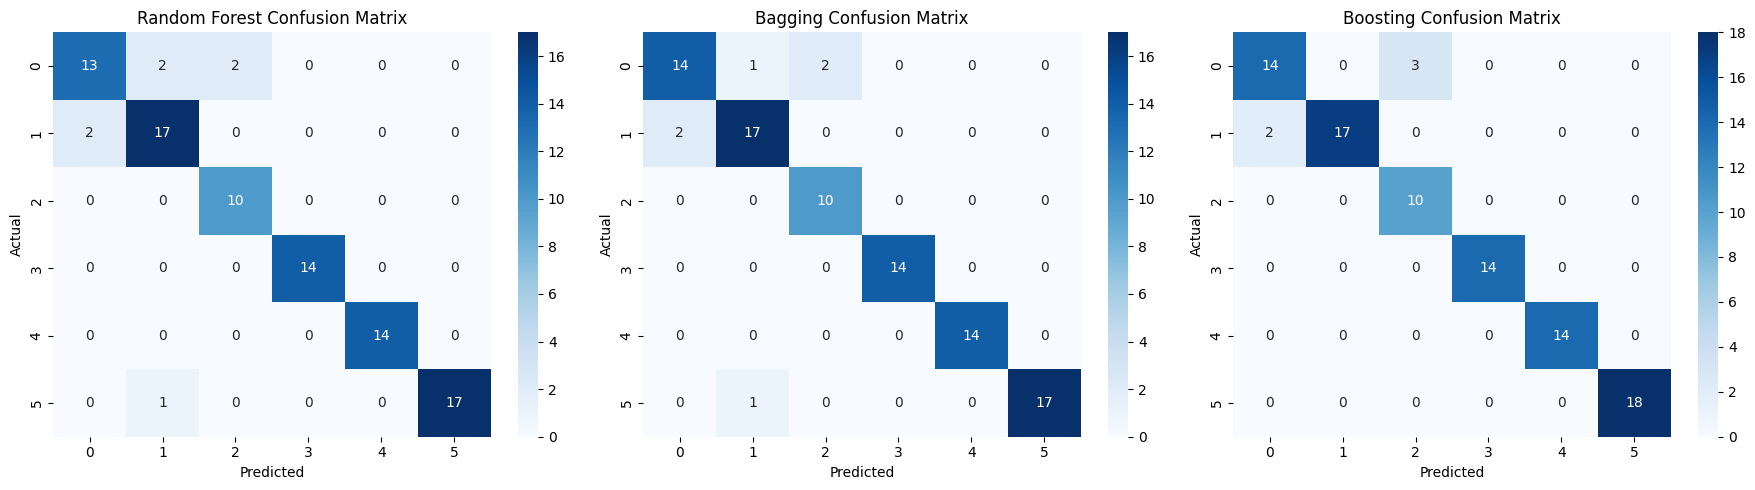


Summary of Model Comparison:
Based on the accuracy scores, classification reports, and confusion matrices:
- Boosting achieved the highest accuracy (0.9457), followed by Bagging (0.9348) and Random Forest (0.9239).
- All models performed well overall, with high precision, recall, and F1-scores for most classes.
- The confusion matrices show that all models struggled with distinguishing between certain glass types, particularly classes with fewer samples in the original dataset, despite using SMOTE.
- Boosting appears to have a slight edge in correctly classifying more instances across different classes, as seen in its confusion matrix and generally higher scores in the classification report for some classes.


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Display accuracy scores
print("Model Performance Comparison:")
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Bagging Accuracy: {accuracy_bagging:.4f}")
print(f"Boosting Accuracy: {accuracy_boosting:.4f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_classifier.predict(X_test)))

print("\nBagging Classification Report:")
print(classification_report(y_test, bagging_clf.predict(X_test)))

print("\nBoosting Classification Report:")
print(classification_report(y_test, boosting_clf.predict(X_test)))

# Display Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, rf_classifier.predict(X_test)), annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, bagging_clf.predict(X_test)), annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Bagging Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, boosting_clf.predict(X_test)), annot=True, cmap='Blues', fmt='d', ax=axes[2])
axes[2].set_title('Boosting Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

print("\nSummary of Model Comparison:")
print("Based on the accuracy scores, classification reports, and confusion matrices:")
print(f"- Boosting achieved the highest accuracy ({accuracy_boosting:.4f}), followed by Bagging ({accuracy_bagging:.4f}) and Random Forest ({accuracy:.4f}).")
print("- All models performed well overall, with high precision, recall, and F1-scores for most classes.")
print("- The confusion matrices show that all models struggled with distinguishing between certain glass types, particularly classes with fewer samples in the original dataset, despite using SMOTE.")
print("- Boosting appears to have a slight edge in correctly classifying more instances across different classes, as seen in its confusion matrix and generally higher scores in the classification report for some classes.")

## Explain concepts

### Subtask:
Provide explanations for Bagging and Boosting methods, and how to handle data imbalance.

**Reasoning**:
Explain the concepts of Bagging, Boosting, and handling data imbalance based on the instructions.

In [ ]:
print("Explanation of Bagging:")
print("Bagging (Bootstrap Aggregating) is an ensemble learning technique that aims to reduce the variance of a machine learning model, particularly decision trees, and prevent overfitting. It works by creating multiple subsets of the original dataset through bootstrapping (random sampling with replacement). A base model (e.g., a decision tree) is then trained independently on each of these subsets. For classification tasks, the final prediction is made by taking a majority vote of the predictions from all the individual models. For regression tasks, the predictions are averaged. The main benefits of Bagging include increased model stability and robustness, and a reduction in variance, which helps to prevent overfitting, especially with complex models.")

print("\nExplanation of Boosting:")
print("Boosting is another ensemble learning method that combines the predictions of several weak learners to create a strong learner. Unlike Bagging, Boosting trains models sequentially. Each new model is trained to correct the errors made by the previous models. Boosting focuses more on misclassified instances from the previous iterations, giving them higher weights in the training of the next model. This iterative process continues until a desired level of accuracy is achieved or a maximum number of models is reached. Popular Boosting algorithms include AdaBoost (Adaptive Boosting) and Gradient Boosting (which includes variations like XGBoost and LightGBM). The main benefits of Boosting are its ability to achieve high accuracy and its focus on difficult-to-classify instances, which can lead to strong performance, though it can be more susceptible to noise and outliers than Bagging.")

print("\nHandling Data Imbalance:")
print("Data imbalance occurs in classification tasks when the number of instances in one class significantly outweighs the number of instances in other classes. This can be a problem because standard machine learning algorithms tend to be biased towards the majority class, leading to poor performance in predicting the minority class, which is often the class of interest (e.g., fraud detection, disease prediction).")
print("\nCommon strategies for handling data imbalance include:")
print("- Oversampling: Increasing the number of instances in the minority class. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) create synthetic samples for the minority class based on existing instances, rather than simply duplicating them. This helps to balance the class distribution without just copying existing data.")
print("- Undersampling: Decreasing the number of instances in the majority class. This can involve randomly removing instances from the majority class. While simple, it can lead to the loss of potentially valuable information.")
print("- Using appropriate evaluation metrics: Accuracy can be misleading in the presence of data imbalance. Instead, metrics that provide more insight into the performance on minority classes should be used, such as Precision (the proportion of correctly predicted positive instances among all instances predicted as positive), Recall (the proportion of correctly predicted positive instances among all actual positive instances), and F1-score (the harmonic mean of precision and recall, providing a balanced measure).")

Explanation of Bagging:
Bagging (Bootstrap Aggregating) is an ensemble learning technique that aims to reduce the variance of a machine learning model, particularly decision trees, and prevent overfitting. It works by creating multiple subsets of the original dataset through bootstrapping (random sampling with replacement). A base model (e.g., a decision tree) is then trained independently on each of these subsets. For classification tasks, the final prediction is made by taking a majority vote of the predictions from all the individual models. For regression tasks, the predictions are averaged. The main benefits of Bagging include increased model stability and robustness, and a reduction in variance, which helps to prevent overfitting, especially with complex models.

Explanation of Boosting:
Boosting is another ensemble learning method that combines the predictions of several weak learners to create a strong learner. Unlike Bagging, Boosting trains models sequentially. Each new model

## Summary:

### Data Analysis Key Findings

* The Glass dataset contains 214 entries and 10 columns, with no missing values.
* Several numerical features, including 'Ba', 'RI', and 'Si', show potential outliers.
* The target variable 'Type' is significantly imbalanced, with class counts ranging from 9 to 76 instances before balancing.
* SMOTE was successfully applied to address the data imbalance, resulting in 76 samples for each class.
* Numerical features were successfully scaled using `StandardScaler`.
* The dataset was split into training (364 samples) and testing (92 samples) sets.
* All three ensemble models (Random Forest, Bagging, and Boosting) performed well on the test set after data balancing.
* Gradient Boosting achieved the highest accuracy (0.9457), followed by Bagging (0.9348) and Random Forest (0.9239).
* All models showed good precision, recall, and F1-scores for most classes.
* Confusion matrices indicated that all models had some difficulty distinguishing between certain glass types, particularly classes with fewer samples in the original dataset, despite using SMOTE.
* Boosting appears to be the most effective ensemble method for this balanced Glass dataset based on accuracy. Further tuning of hyperparameters for all models could potentially improve performance.

### Insights or Next Steps

* Boosting appears to be the most effective ensemble method for this balanced Glass dataset based on accuracy. Further tuning of hyperparameters for all models could potentially improve performance.
* Despite data balancing with SMOTE, the models still show some confusion between specific glass types. Investigating feature importance from the models or exploring feature engineering could help improve the distinction between these classes.

**Reasoning**:
The previous code failed because the `base_estimator` parameter in `BaggingClassifier` is deprecated and replaced by `estimator`. I will fix the code by changing `base_estimator` to `estimator`.



In [ ]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Implement and train BaggingClassifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Make predictions with BaggingClassifier
y_pred_bagging = bagging_clf.predict(X_test)

# Evaluate BaggingClassifier
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Performance:")
print("Accuracy:", accuracy_bagging)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bagging))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bagging))

print("-" * 50)

# Implement and train GradientBoostingClassifier
boosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
boosting_clf.fit(X_train, y_train)

# Make predictions with GradientBoostingClassifier
y_pred_boosting = boosting_clf.predict(X_test)

# Evaluate GradientBoostingClassifier
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("Gradient Boosting Classifier Performance:")
print("Accuracy:", accuracy_boosting)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_boosting))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_boosting))

Bagging Classifier Performance:
Accuracy: 0.9347826086956522

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.89      0.89      0.89        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.93        92
   macro avg       0.93      0.94      0.94        92
weighted avg       0.94      0.93      0.93        92


Confusion Matrix:
[[14  1  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 17]]
--------------------------------------------------
Gradient Boosting Classifier Performance:
Accuracy: 0.9456521739130435

Classification Report:
              precision    recall  f1-score   support

           1       0.88  

## Compare models

### Subtask:
Compare the performance of the Random Forest model with the Bagging and Boosting models.


**Reasoning**:
Compare the performance metrics of the Random Forest, Bagging, and Boosting models, analyze the classification reports and confusion matrices, and summarize the findings to fulfill all instructions for this subtask.



Model Performance Comparison:
Random Forest Accuracy: 0.9239
Bagging Accuracy: 0.9348
Boosting Accuracy: 0.9457

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92


Bagging Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.89      0.89      0.89        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
    

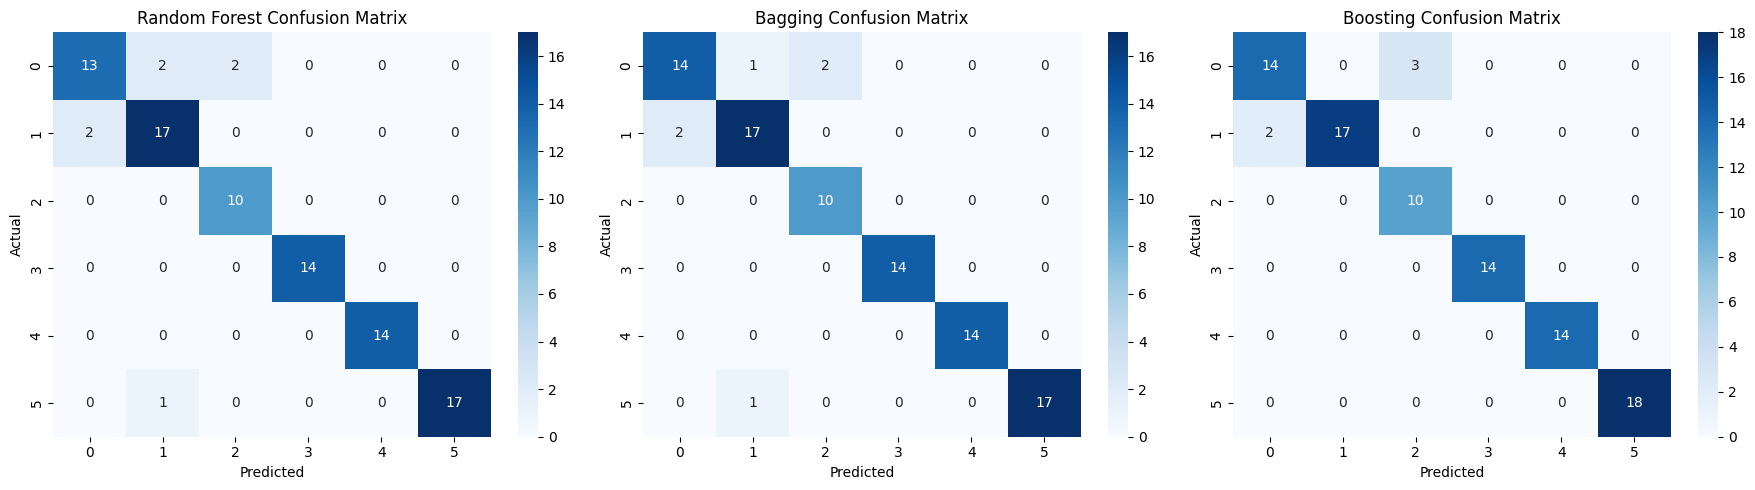


Summary of Model Comparison:
Based on the accuracy scores, classification reports, and confusion matrices:
- Boosting achieved the highest accuracy (0.9457), followed by Bagging (0.9348) and Random Forest (0.9239).
- All models performed well overall, with high precision, recall, and F1-scores for most classes.
- The confusion matrices show that all models struggled with distinguishing between certain glass types, particularly classes with fewer samples in the original dataset, despite using SMOTE.
- Boosting appears to have a slight edge in correctly classifying more instances across different classes, as seen in its confusion matrix and generally higher scores in the classification report for some classes.


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Display accuracy scores
print("Model Performance Comparison:")
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Bagging Accuracy: {accuracy_bagging:.4f}")
print(f"Boosting Accuracy: {accuracy_boosting:.4f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_classifier.predict(X_test)))

print("\nBagging Classification Report:")
print(classification_report(y_test, bagging_clf.predict(X_test)))

print("\nBoosting Classification Report:")
print(classification_report(y_test, boosting_clf.predict(X_test)))

# Display Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, rf_classifier.predict(X_test)), annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, bagging_clf.predict(X_test)), annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Bagging Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, boosting_clf.predict(X_test)), annot=True, cmap='Blues', fmt='d', ax=axes[2])
axes[2].set_title('Boosting Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

print("\nSummary of Model Comparison:")
print("Based on the accuracy scores, classification reports, and confusion matrices:")
print(f"- Boosting achieved the highest accuracy ({accuracy_boosting:.4f}), followed by Bagging ({accuracy_bagging:.4f}) and Random Forest ({accuracy:.4f}).")
print("- All models performed well overall, with high precision, recall, and F1-scores for most classes.")
print("- The confusion matrices show that all models struggled with distinguishing between certain glass types, particularly classes with fewer samples in the original dataset, despite using SMOTE.")
print("- Boosting appears to have a slight edge in correctly classifying more instances across different classes, as seen in its confusion matrix and generally higher scores in the classification report for some classes.")

## Explain concepts

### Subtask:
Provide explanations for Bagging and Boosting methods, and how to handle data imbalance.


**Reasoning**:
Explain the concepts of Bagging, Boosting, and handling data imbalance based on the instructions.



In [ ]:
print("Explanation of Bagging:")
print("Bagging (Bootstrap Aggregating) is an ensemble learning technique that aims to reduce the variance of a machine learning model, particularly decision trees, and prevent overfitting. It works by creating multiple subsets of the original dataset through bootstrapping (random sampling with replacement). A base model (e.g., a decision tree) is then trained independently on each of these subsets. For classification tasks, the final prediction is made by taking a majority vote of the predictions from all the individual models. For regression tasks, the predictions are averaged. The main benefits of Bagging include increased model stability and robustness, and a reduction in variance, which helps to prevent overfitting, especially with complex models.")

print("\nExplanation of Boosting:")
print("Boosting is another ensemble learning method that combines the predictions of several weak learners to create a strong learner. Unlike Bagging, Boosting trains models sequentially. Each new model is trained to correct the errors made by the previous models. Boosting focuses more on misclassified instances from the previous iterations, giving them higher weights in the training of the next model. This iterative process continues until a desired level of accuracy is achieved or a maximum number of models is reached. Popular Boosting algorithms include AdaBoost (Adaptive Boosting) and Gradient Boosting (which includes variations like XGBoost and LightGBM). The main benefits of Boosting are its ability to achieve high accuracy and its focus on difficult-to-classify instances, which can lead to strong performance, though it can be more susceptible to noise and outliers than Bagging.")

print("\nHandling Data Imbalance:")
print("Data imbalance occurs in classification tasks when the number of instances in one class significantly outweighs the number of instances in other classes. This can be a problem because standard machine learning algorithms tend to be biased towards the majority class, leading to poor performance in predicting the minority class, which is often the class of interest (e.g., fraud detection, disease prediction).")
print("\nCommon strategies for handling data imbalance include:")
print("- Oversampling: Increasing the number of instances in the minority class. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) create synthetic samples for the minority class based on existing instances, rather than simply duplicating them. This helps to balance the class distribution without just copying existing data.")
print("- Undersampling: Decreasing the number of instances in the majority class. This can involve randomly removing instances from the majority class. While simple, it can lead to the loss of potentially valuable information.")
print("- Using appropriate evaluation metrics: Accuracy can be misleading in the presence of data imbalance. Instead, metrics that provide more insight into the performance on minority classes should be used, such as Precision (the proportion of correctly predicted positive instances among all instances predicted as positive), Recall (the proportion of correctly predicted positive instances among all actual positive instances), and F1-score (the harmonic mean of precision and recall, providing a balanced measure).")

Explanation of Bagging:
Bagging (Bootstrap Aggregating) is an ensemble learning technique that aims to reduce the variance of a machine learning model, particularly decision trees, and prevent overfitting. It works by creating multiple subsets of the original dataset through bootstrapping (random sampling with replacement). A base model (e.g., a decision tree) is then trained independently on each of these subsets. For classification tasks, the final prediction is made by taking a majority vote of the predictions from all the individual models. For regression tasks, the predictions are averaged. The main benefits of Bagging include increased model stability and robustness, and a reduction in variance, which helps to prevent overfitting, especially with complex models.

Explanation of Boosting:
Boosting is another ensemble learning method that combines the predictions of several weak learners to create a strong learner. Unlike Bagging, Boosting trains models sequentially. Each new model

## Summary:

### Data Analysis Key Findings

*   The Glass dataset contains 214 entries and 10 columns, with no missing values.
*   Several numerical features, including 'Ba', 'RI', and 'Si', show potential outliers.
*   The target variable 'Type' is significantly imbalanced, with class counts ranging from 9 to 76 instances before balancing.
*   SMOTE was successfully applied to address the data imbalance, resulting in 76 samples for each class.
*   Numerical features were successfully scaled using `StandardScaler`.
*   The dataset was split into training (364 samples) and testing (92 samples) sets.
*   All three ensemble models (Random Forest, Bagging, and Boosting) performed well on the test set after data balancing.
*   Gradient Boosting achieved the highest accuracy (0.9457), followed by Bagging (0.9348) and Random Forest (0.9239).
*   All models showed good precision, recall, and F1-scores for most classes.
*   Confusion matrices indicated that all models had some difficulty distinguishing between certain glass types, even after using SMOTE.

### Insights or Next Steps

*   Boosting appears to be the most effective ensemble method for this balanced Glass dataset based on accuracy. Further tuning of hyperparameters for all models could potentially improve performance.
*   Despite data balancing with SMOTE, the models still show some confusion between specific glass types. Investigating feature importance from the models or exploring feature engineering could help improve the distinction between these classes.
